<a href="https://colab.research.google.com/github/mnassar/segfault/blob/main/SegFault_Segmentation_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation Fault: A cheap defense against adversarial machine learning
## Table III, IV and V 

## Authors: Mohamed Nassar, Doha Al Bared
### Department of Computer Science 
### AUB 


In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1H4KEE0Vp8DFZOe_QfcxqOxEVnpun-uka' -O CIFAR10model.h5

--2021-05-28 11:15:39--  https://docs.google.com/uc?export=download&id=1H4KEE0Vp8DFZOe_QfcxqOxEVnpun-uka
Resolving docs.google.com (docs.google.com)... 74.125.204.113, 74.125.204.139, 74.125.204.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/amu9jtld4kn6tt6l36lbn83uc3cfggca/1622200500000/13345485370729250143/*/1H4KEE0Vp8DFZOe_QfcxqOxEVnpun-uka?e=download [following]
--2021-05-28 11:15:41--  https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/amu9jtld4kn6tt6l36lbn83uc3cfggca/1622200500000/13345485370729250143/*/1H4KEE0Vp8DFZOe_QfcxqOxEVnpun-uka?e=download
Resolving doc-0s-68-docs.googleusercontent.com (doc-0s-68-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-0s-68-docs.googleusercontent.com (doc-0s-68-d

In [ ]:
# load the cifar classifier
from tensorflow.keras.models import load_model

pretrained_model = load_model('CIFAR10model.h5')
pretrained_model.trainable = False
pretrained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)       

# CIFAR 10 

In [ ]:
#get dataset: cifar10

import tensorflow_datasets as tfds


from keras.datasets import cifar10
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print("-------------")
print (ds_info)

-------------
tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)



In [ ]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

# normalize images 

# these are the numbers used during training the model 
mean = 120.70748
std = 64.150024
bound_min = (0-mean)/std
bound_max = (255-mean)/std
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  # return tf.cast(image, tf.float32) / 255., tf.one_hot(label, 10)
  return (tf.cast(image, tf.float32) - mean) / std, tf.one_hot(label, 10)


ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
iter_ds_train = iter(ds_train)

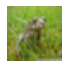

frog frog


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(iter_ds_train)
preds = pretrained_model.predict(images)
img = images[0]
label = labels[0]
pred = preds[0]
img = img.numpy()

plt.figure(figsize = (1,1))
plt.axis('off')
plt.imshow((img * std + mean).astype(np.uint8))
plt.show()
print (class_names[np.argmax(label)], class_names[np.argmax(pred)])


# Felzenszwalb

In [ ]:
from skimage.segmentation import  felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float



Felzenszwalb's number of segments: 14


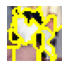

dog dog
Felzenszwalb's number of segments: 14


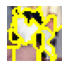

dog dog
Felzenszwalb's number of segments: 18


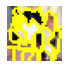

dog dog
Felzenszwalb's number of segments: 9


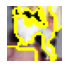

dog dog


In [ ]:


images, labels = next(iter_ds_train)
preds = pretrained_model.predict(images)
img = images[0]
label = labels[0]
pred = preds[0]
img = img.numpy()

for s in [1,10,100, 1000]:
  segImg = felzenszwalb(img, scale=s)
  print("Felzenszwalb's number of segments: %d" % len(np.unique(segImg)))

  plt.figure(figsize = (1,1))
  plt.axis('off')
  plt.imshow(mark_boundaries((img * std + mean).astype(np.uint8), segImg))
  plt.show()
  print (class_names[np.argmax(label)], class_names[np.argmax(pred)])




# QuickShift

In [ ]:
d={}

Quick Shift's number of segments: 400


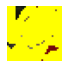

dog bird
Quick Shift's number of segments: 82


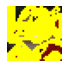

dog bird
Quick Shift's number of segments: 275


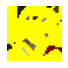

dog bird
Quick Shift's number of segments: 47


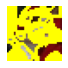

dog bird
Quick Shift's number of segments: 145


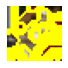

dog bird
Quick Shift's number of segments: 30


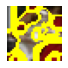

dog bird


In [ ]:
images, labels = next(iter_ds_train)
preds = pretrained_model.predict(images)
img = images[0]
label = labels[0]
pred = preds[0]
img = img.numpy()

d[class_names[np.argmax(label)]] = {} 

for s in [0,1,2]:
  for m in [10, 20]:
    
    segImg = quickshift(img, sigma=s, max_dist=m)
    print("Quick Shift's number of segments: %d" % len(np.unique(segImg)))
    d[class_names[np.argmax(label)]][(s,m)] =len(np.unique(segImg)) 

    plt.figure(figsize = (1,1))
    plt.axis('off')
    plt.imshow(mark_boundaries((img * std + mean).astype(np.uint8), segImg))
    plt.show()
    print (class_names[np.argmax(label)], class_names[np.argmax(pred)])


In [ ]:
import pprint 
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(d)

{   'dog': {   (0, 10): 400,
               (0, 20): 82,
               (1, 10): 275,
               (1, 20): 47,
               (2, 10): 145,
               (2, 20): 30}}


# SLIC

SLIC number of segments: 1


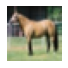

horse horse
SLIC number of segments: 18


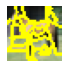

horse horse
SLIC number of segments: 38


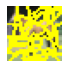

horse horse
SLIC number of segments: 96


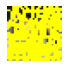

horse horse


In [ ]:


images, labels = next(iter_ds_train)
preds = pretrained_model.predict(images)
img = images[0]
label = labels[0]
pred = preds[0]
img = img.numpy()



for n in [1, 32, 64, 128]:
  segImg = slic(img, n_segments=n)
  print("SLIC number of segments: %d" % len(np.unique(segImg)))
  plt.figure(figsize = (1,1))
  plt.axis('off')
  plt.imshow(mark_boundaries((img * std + mean).astype(np.uint8), segImg))
  plt.show()
  print (class_names[np.argmax(label)], class_names[np.argmax(pred)])
